# Design of Experiment

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
df = pd.read_csv("../dataset/star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
TARGET = "class"

## Exploratory Data Analysis

### Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
df.shape

(100000, 18)

In [6]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [7]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


## Data Preprocessing

### Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=[TARGET])
y = df[TARGET]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.Series(y)

class_labels = np.unique(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

The train-test split is done before any preprocessing to avoid data leakage. The steps below under the heading "Data Preprocessing" will be part of the pipeline done in the cross validation step, avoiding data leakage between train and cross-validation set.

### Missing Values

In [9]:
missing_percentage_X = (X.isnull().sum() / len(X)) * 100
print("Missing values in features (X):")
for column, percentage in missing_percentage_X.items():
    print(f"Feature {column} has {percentage:.2f}% missing values")

# Calculate missing values percentage for labels (y)
missing_percentage_y = (y.isnull().sum() / len(y)) * 100
print(f"\nMissing values in labels (y): {missing_percentage_y:.2f}%")

Missing values in features (X):
Feature obj_ID has 0.00% missing values
Feature alpha has 0.00% missing values
Feature delta has 0.00% missing values
Feature u has 0.00% missing values
Feature g has 0.00% missing values
Feature r has 0.00% missing values
Feature i has 0.00% missing values
Feature z has 0.00% missing values
Feature run_ID has 0.00% missing values
Feature rerun_ID has 0.00% missing values
Feature cam_col has 0.00% missing values
Feature field_ID has 0.00% missing values
Feature spec_obj_ID has 0.00% missing values
Feature redshift has 0.00% missing values
Feature plate has 0.00% missing values
Feature MJD has 0.00% missing values
Feature fiber_ID has 0.00% missing values

Missing values in labels (y): 0.00%


There is no missing value. If there exist any missing value, it must be handled to avoid errors or unwanted bias.

### Outlier Detection and Removal

Outlier detection and removeal is done to avoid bias which may arise due to the outliers influencing the mean, variance, or correlation. Outliers can also cause optimization algorithms to get stuck in local optimum.

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierRemovalIQR(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.lower_bounds_ = {}
        self.upper_bounds_ = {}
        
        for column in X.select_dtypes(include=[np.number]).columns:
            Q1 = X[column].quantile(0.25)
            Q3 = X[column].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bounds_[column] = Q1 - 1.5 * IQR
            self.upper_bounds_[column] = Q3 + 1.5 * IQR
        
        return self

    def transform(self, X, y=None):
        X_clean = X.copy()
        for column in self.lower_bounds_:
            lower_bound = self.lower_bounds_[column]
            upper_bound = self.upper_bounds_[column]
            X_clean = X_clean[(X_clean[column] >= lower_bound) & (X_clean[column] <= upper_bound)]
        
        if y is not None:
            y_clean = y.loc[X_clean.index]
            X_clean.reset_index(drop=True, inplace=True)
            y_clean.reset_index(drop=True, inplace=True)
            return X_clean, y_clean
        
        X_clean.reset_index(drop=True, inplace=True)
        return X_clean

### Data Transformation

In [11]:
from scipy.stats import shapiro

def check_normality(data):
    stat, p_value = shapiro(data)
    return stat, p_value

print("Checking normality for features in X:")
for feature in X.columns:
    stat, p_value = check_normality(X[feature])
    print(f'Feature: {feature} - Statistic: {stat:.4f}, p-value: {p_value:.4f}')
    if p_value < 0.05:
        print(f'  Result (with 95% confidence): Feature {feature} is not normally distributed.')
    else:
        print(f'  Result (with 95% confidence): Feature {feature} is approximately normally distributed.')

Checking normality for features in X:
Feature: obj_ID - Statistic: 0.9425, p-value: 0.0000
  Result (with 95% confidence): Feature obj_ID is not normally distributed.
Feature: alpha - Statistic: 0.9564, p-value: 0.0000
  Result (with 95% confidence): Feature alpha is not normally distributed.
Feature: delta - Statistic: 0.9621, p-value: 0.0000
  Result (with 95% confidence): Feature delta is not normally distributed.
Feature: u - Statistic: 0.0072, p-value: 0.0000
  Result (with 95% confidence): Feature u is not normally distributed.
Feature: g - Statistic: 0.0060, p-value: 0.0000
  Result (with 95% confidence): Feature g is not normally distributed.
Feature: r - Statistic: 0.9625, p-value: 0.0000
  Result (with 95% confidence): Feature r is not normally distributed.
Feature: i - Statistic: 0.9770, p-value: 0.0000
  Result (with 95% confidence): Feature i is not normally distributed.
Feature: z - Statistic: 0.0049, p-value: 0.0000
  Result (with 95% confidence): Feature z is not normal

c:\Users\Julian\Programming\Seleksi-GaIB-22\DoE-Supervised-Unsupervised-from-Scratch\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Julian\Programming\Seleksi-GaIB-22\DoE-Supervised-Unsupervised-from-Scratch\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


Since most features are not normally distributed, the features will later be normalized, not standardized

### Preprocessing Pipeline

The pipeline will include outlier detection and removal, data standardization, and oversampling (SMOTE).

Data standardization is important to ensure consistent scaling which otherwise would cause bias. It allows better interpretation of results, numerical stability, and improved convergence in optimization algorithm.

Undersampling is done due to target count imbalance. This is done to reduce bias. Oversampling is not used since it will increase the compute.

In [12]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

preprocessing_pipeline = ImbPipeline([
    ('outlier_removal', OutlierRemovalIQR()),
    ('scaler', MinMaxScaler()),
    ('undersampler', RandomUnderSampler(sampling_strategy='auto'))
])

Ideally the above pipeline could become the argument for the cross_val_score function. However, since the pipeline cannot access y, the outlier removal will be done before the cross validation. This will cause data leakage between train and cross validation but simplifying the process.

In [13]:
class OutlierRemovalIQR():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.lower_bounds_ = {}
        self.upper_bounds_ = {}
        
        for column in X.select_dtypes(include=[np.number]).columns:
            Q1 = X[column].quantile(0.25)
            Q3 = X[column].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bounds_[column] = Q1 - 1.5 * IQR
            self.upper_bounds_[column] = Q3 + 1.5 * IQR
        
        return self

    def transform(self, X, y=None):
        X_clean = X.copy()
        for column in self.lower_bounds_:
            lower_bound = self.lower_bounds_[column]
            upper_bound = self.upper_bounds_[column]
            X_clean = X_clean[(X_clean[column] >= lower_bound) & (X_clean[column] <= upper_bound)]
        
        if y is not None:
            y_clean = y.loc[X_clean.index]
            X_clean.reset_index(drop=True, inplace=True)
            y_clean.reset_index(drop=True, inplace=True)
            return X_clean, y_clean
        
        X_clean.reset_index(drop=True, inplace=True)
        return X_clean

In [14]:
outlier_removal = OutlierRemovalIQR()

outlier_removal.fit(X_train, y_train)
X_train, y_train = outlier_removal.transform(X_train, y_train)

## Modelling

### Evaluation Metrics

Since the dataset is a multiclass classification problem, the metrics used will be accuracy, precision, recall, F1 score, confusion matrix, and the average of metrics

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

In [16]:
def display_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    plot_confusion_matrix(y_test, y_pred, class_labels)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall", recall)
    print("F1 score:", f1)

### Import Classifiers

In [17]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Baseline Model (Logistic Regression)

In [18]:
pipeline = ImbPipeline([
    ('scaler', MinMaxScaler()),
    ('undersampler', RandomUnderSampler(sampling_strategy='auto')),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

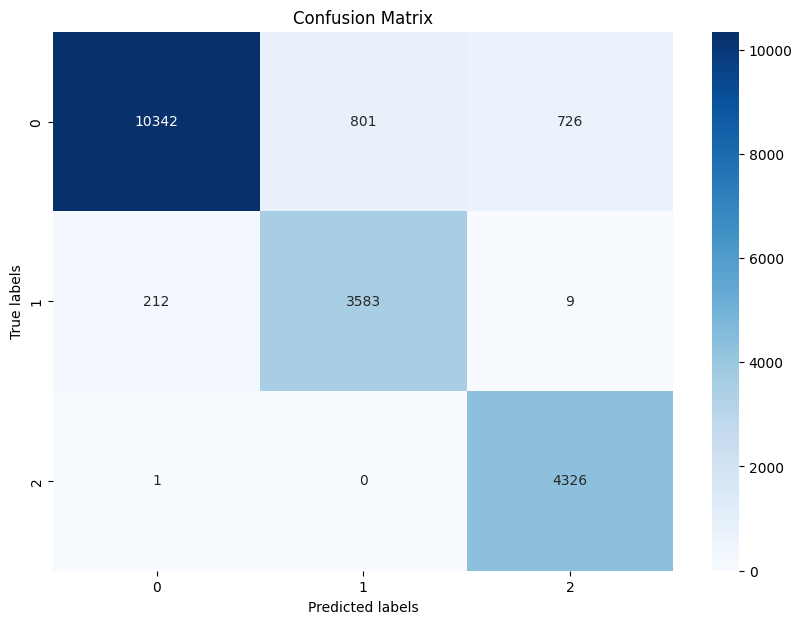

Accuracy: 0.91255
Precision: 0.8839606402478614
Recall 0.9376725582239976
F1 score: 0.9063966022064293


In [19]:
display_metrics(y_test, y_pred)

The baseline model work pretty well already

#### Model From Scratch Comparison

In [20]:
from supervised_learning.softreg import LogisticRegression as CustomLogisticRegression

In [21]:
pipeline = ImbPipeline([
    ('scaler', MinMaxScaler()),
    ('undersampler', RandomUnderSampler(sampling_strategy='auto')),
    ('classifier', CustomLogisticRegression(learning_rate=0.02))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

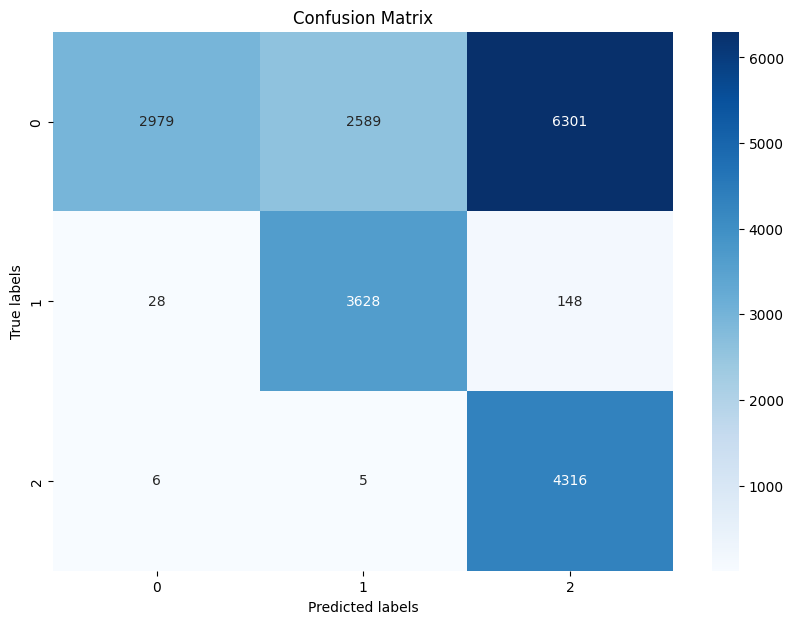

Accuracy: 0.54615
Precision: 0.6575789185146003
Recall 0.734060236525675
F1 score: 0.5653421337761296


In [22]:
display_metrics(y_test, y_pred)

### KNN

In [23]:
pipeline = ImbPipeline([
    ('scaler', MinMaxScaler()),
    ('undersampler', RandomUnderSampler(sampling_strategy='auto')),
    ('classifier', KNeighborsClassifier(n_neighbors=len(class_labels)))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

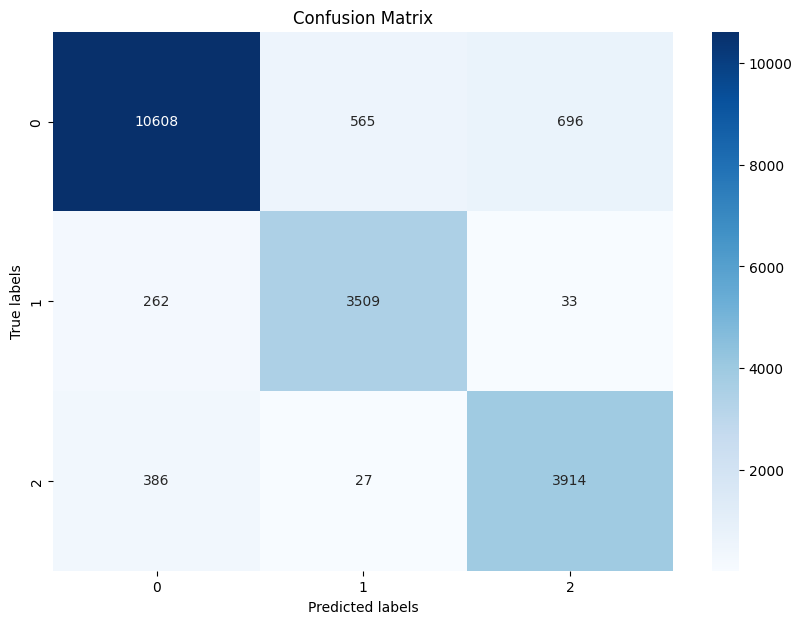

Accuracy: 0.90155
Precision: 0.8803550382486911
Recall 0.9069199020301303
F1 score: 0.892642639524778


In [24]:
display_metrics(y_test, y_pred)

#### Model From Scratch Comparison

In [25]:
from supervised_learning.knn import KNeighborsClassifier as CustomKNeighborsClassifier

In [30]:
pipeline = ImbPipeline([
    ('scaler', MinMaxScaler()),
    ('undersampler', RandomUnderSampler(sampling_strategy='auto')),
    ('classifier', CustomKNeighborsClassifier(n_neighbors=int(len(X_train) ** 0.5)))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

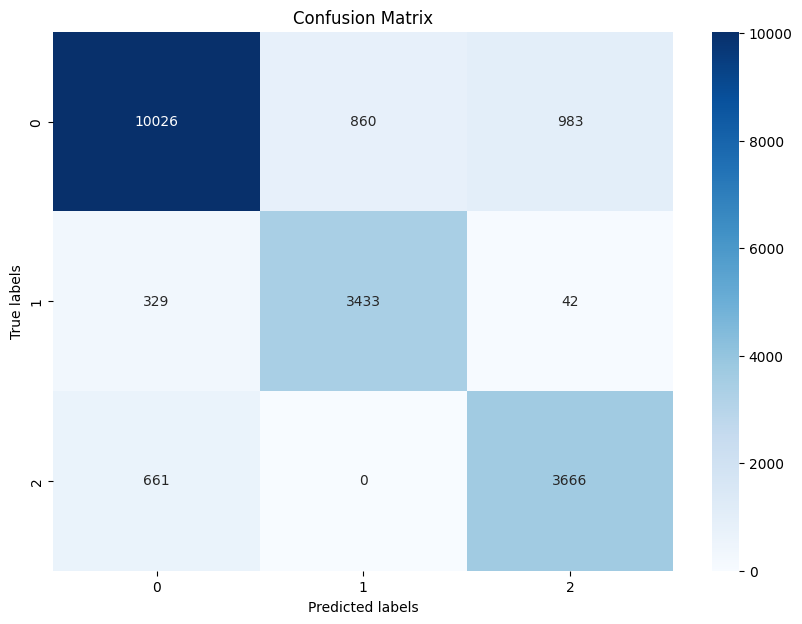

Accuracy: 0.85625
Precision: 0.8304336964349188
Recall 0.8648102993022658
F1 score: 0.8457386971389674


In [31]:
display_metrics(y_test, y_pred)

### Gaussian Naive Bayes

In [32]:
pipeline = ImbPipeline([
    ('scaler', MinMaxScaler()),
    ('undersampler', RandomUnderSampler(sampling_strategy='auto')),
    ('classifier', GaussianNB())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

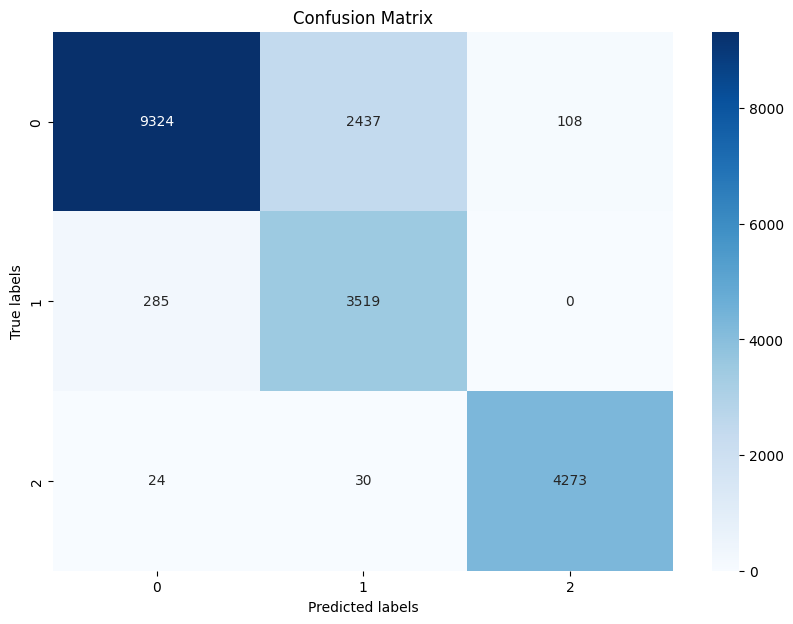

Accuracy: 0.8558
Precision: 0.8437141867236287
Recall 0.8993916520430846
F1 score: 0.8558538038975344


In [33]:
display_metrics(y_test, y_pred)

#### Model From Scratch Comparison

In [47]:
from supervised_learning.naive_bayes import GaussianNB as CustomGaussianNB

In [48]:
pipeline = ImbPipeline([
    ('scaler', MinMaxScaler()),
    ('undersampler', RandomUnderSampler(sampling_strategy='auto')),
    ('classifier', CustomGaussianNB())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

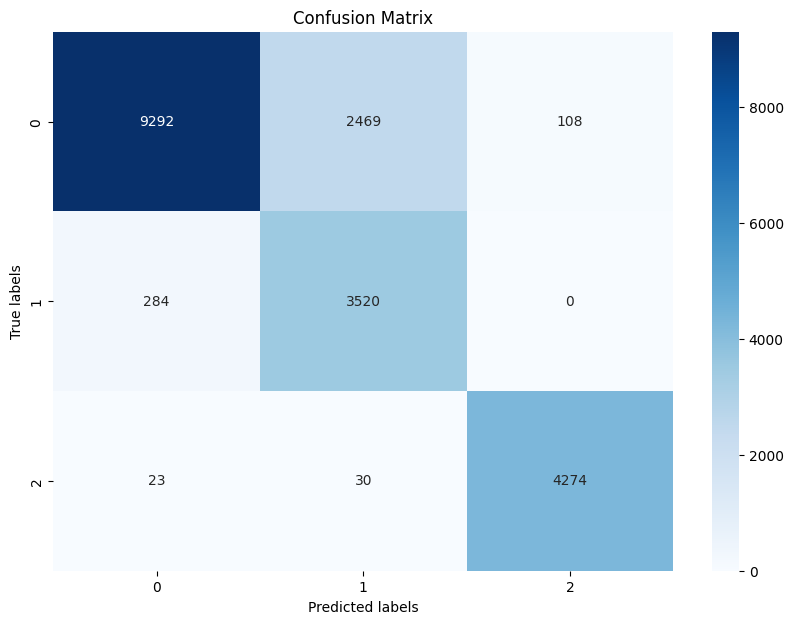

Accuracy: 0.8543
Precision: 0.842728658289016
Recall 0.8986576150759542
F1 score: 0.8546197417645836


In [49]:
display_metrics(y_test, y_pred)